In [15]:
import collections
import itertools
import json
import datetime
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import tqdm

Segments formed (took 0.15 seconds).
Fits performed (took 0.09 seconds).
Fit performed; alpha=0.7324981657928952 c=1.9532369472312452


(0.0, 300000.0)

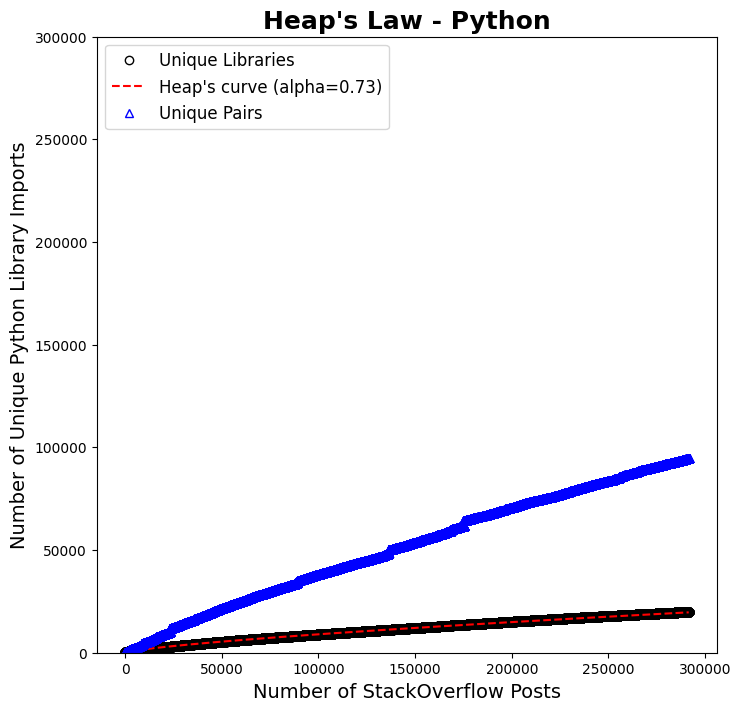

In [121]:
language = "python"
path_to_lib = f"data/results/{language}"

with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
    post_to_libs = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
    all_libs_dates = json.load(handle)
    
with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
    all_pairs_dates = json.load(handle)

t0 = time.time()
xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
t1 = time.time()
print(f"Segments formed (took {round(t1 - t0, 2)} seconds).")

# Unique libs line fit
libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
t2 = time.time()
print(f"Fits performed (took {round(t2 - t1, 2)} seconds).")

###########################
from sklearn.linear_model import LinearRegression
libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
xs = np.array(range(1, len(libs_count)+1))
xs_transformed = np.log(xs).reshape(-1 ,1 )
counts_transformed = np.log(np.array(libs_count) + 1)

model = LinearRegression()
model.fit(xs_transformed, counts_transformed)

alpha = model.coef_[0]
log_c = model.intercept_
c = np.exp(log_c)
print(f"Fit performed; alpha={alpha} c={c}")
############################


plt.figure(figsize=(8,8))

#xs = [int(x) for x in np.geomspace(1, len(xs_libs)-1, 100)]
xs = list(range(len(xs_libs)))
plt.plot(xs, [ys_libs[i] for i in xs],"o", color="black", markerfacecolor='none', label="Unique Libraries")
plt.plot(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (alpha={round(alpha, 2)})")
plt.plot(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none',  label="Unique Pairs")


# plt.xticks(fontsize=12)
plt.title(f"Heap's Law - {language.capitalize()}", fontsize=18, fontweight='bold')
plt.xlabel("Number of StackOverflow Posts", fontsize=14)
plt.ylabel("Number of Unique Python Library Imports", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.ylim(0, 300_000)

/tmp/ipykernel_136456/2011861425.py:43: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100_000)


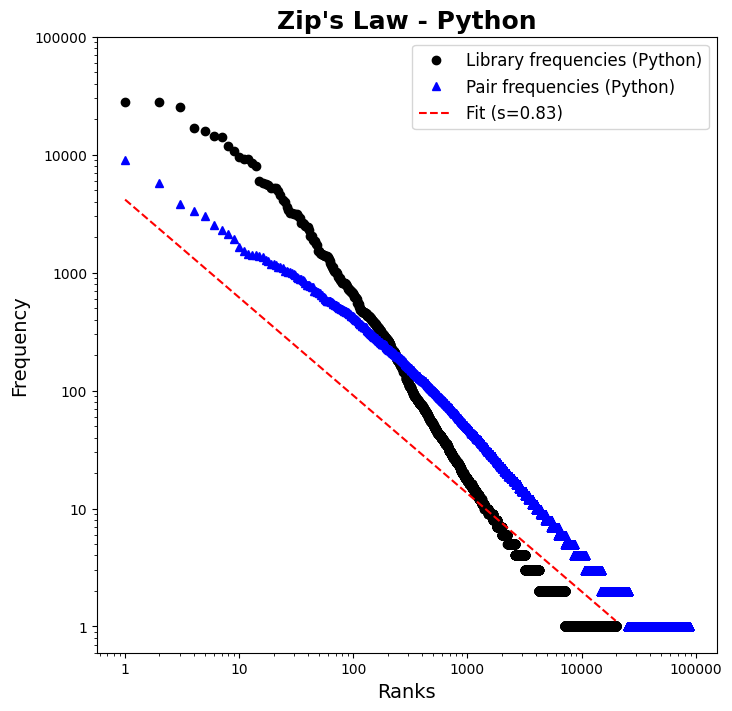

In [122]:
from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter


plt.figure(figsize=(8,8))

libs_freq = {k:len(v) for k, v in all_libs_dates.items()}
sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

pairs_freq = {k:len(v) for k, v in all_pairs_dates.items()}
sorted_pairs_freq = sorted(pairs_freq.items(), key=lambda x: x[1], reverse=True)
sorted_pairs_freq_values = [x[1] for x in sorted_pairs_freq]

xs = range(1, len(sorted_libs_freq) + 1)
plt.plot(xs, sorted_libs_freq_values, "o", color="black", label=f"Library frequencies ({language.capitalize()})")
plt.plot(range(1, len(sorted_pairs_freq) + 1), sorted_pairs_freq_values, "^", color="blue", label=f"Pair frequencies ({language.capitalize()})")


ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
frequencies = np.array(sorted_libs_freq_values)

def zipf(rank, s, k):
    return k / (rank ** s)

# k / (n ** s)
region_start = 100
region_end = 1000
curve_fit(
        zipf,
        ranks[region_start:region_end],
        frequencies[region_start:region_end],
    )
fitted_frequencies = zipf(ranks, s, k)

plt.plot(xs, fitted_frequencies, "--", color="red", label=f"Fit (s={round(s, 2)})")

plt.xlabel("Ranks", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title(f"Zip's Law - {language.capitalize()}", fontsize=18, fontweight='bold')
plt.loglog()
plt.legend(fontsize=12, loc="upper right")
plt.ylim(0, 100_000)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(style='plain', axis='x')

# Subplots depicting all the languages

In [63]:
LANGUAGES = {
    "python": "Python",
    "r" : "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

## Heaps's Law

Processing python
	 Opening resources...
	...done.
	Segments formed (took 0.15 seconds).
	Fits performed (took 0.1 seconds).
	Fit performed; alpha=0.7324981657928952 c=1.9532369472312452
Processing r
	 Opening resources...
	...done.
	Segments formed (took 0.04 seconds).
	Fits performed (took 0.01 seconds).
	Fit performed; alpha=0.5894169889219697 c=4.654027802875085
Processing javascript
	 Opening resources...
	...done.
	Segments formed (took 0.02 seconds).
	Fits performed (took 0.01 seconds).
	Fit performed; alpha=0.8204870586134987 c=1.1088497107420636
Processing java
	 Opening resources...
	...done.
	Segments formed (took 0.09 seconds).
	Fits performed (took 0.04 seconds).
	Fit performed; alpha=0.7639741373912098 c=0.37137713970817865
Processing cpp
	 Opening resources...
	...done.
	Segments formed (took 0.02 seconds).
	Fits performed (took 0.01 seconds).
	Fit performed; alpha=0.8891277844084354 c=2.0868395319604063
Processing php
	 Opening resources...
	...done.
	Segments formed (t

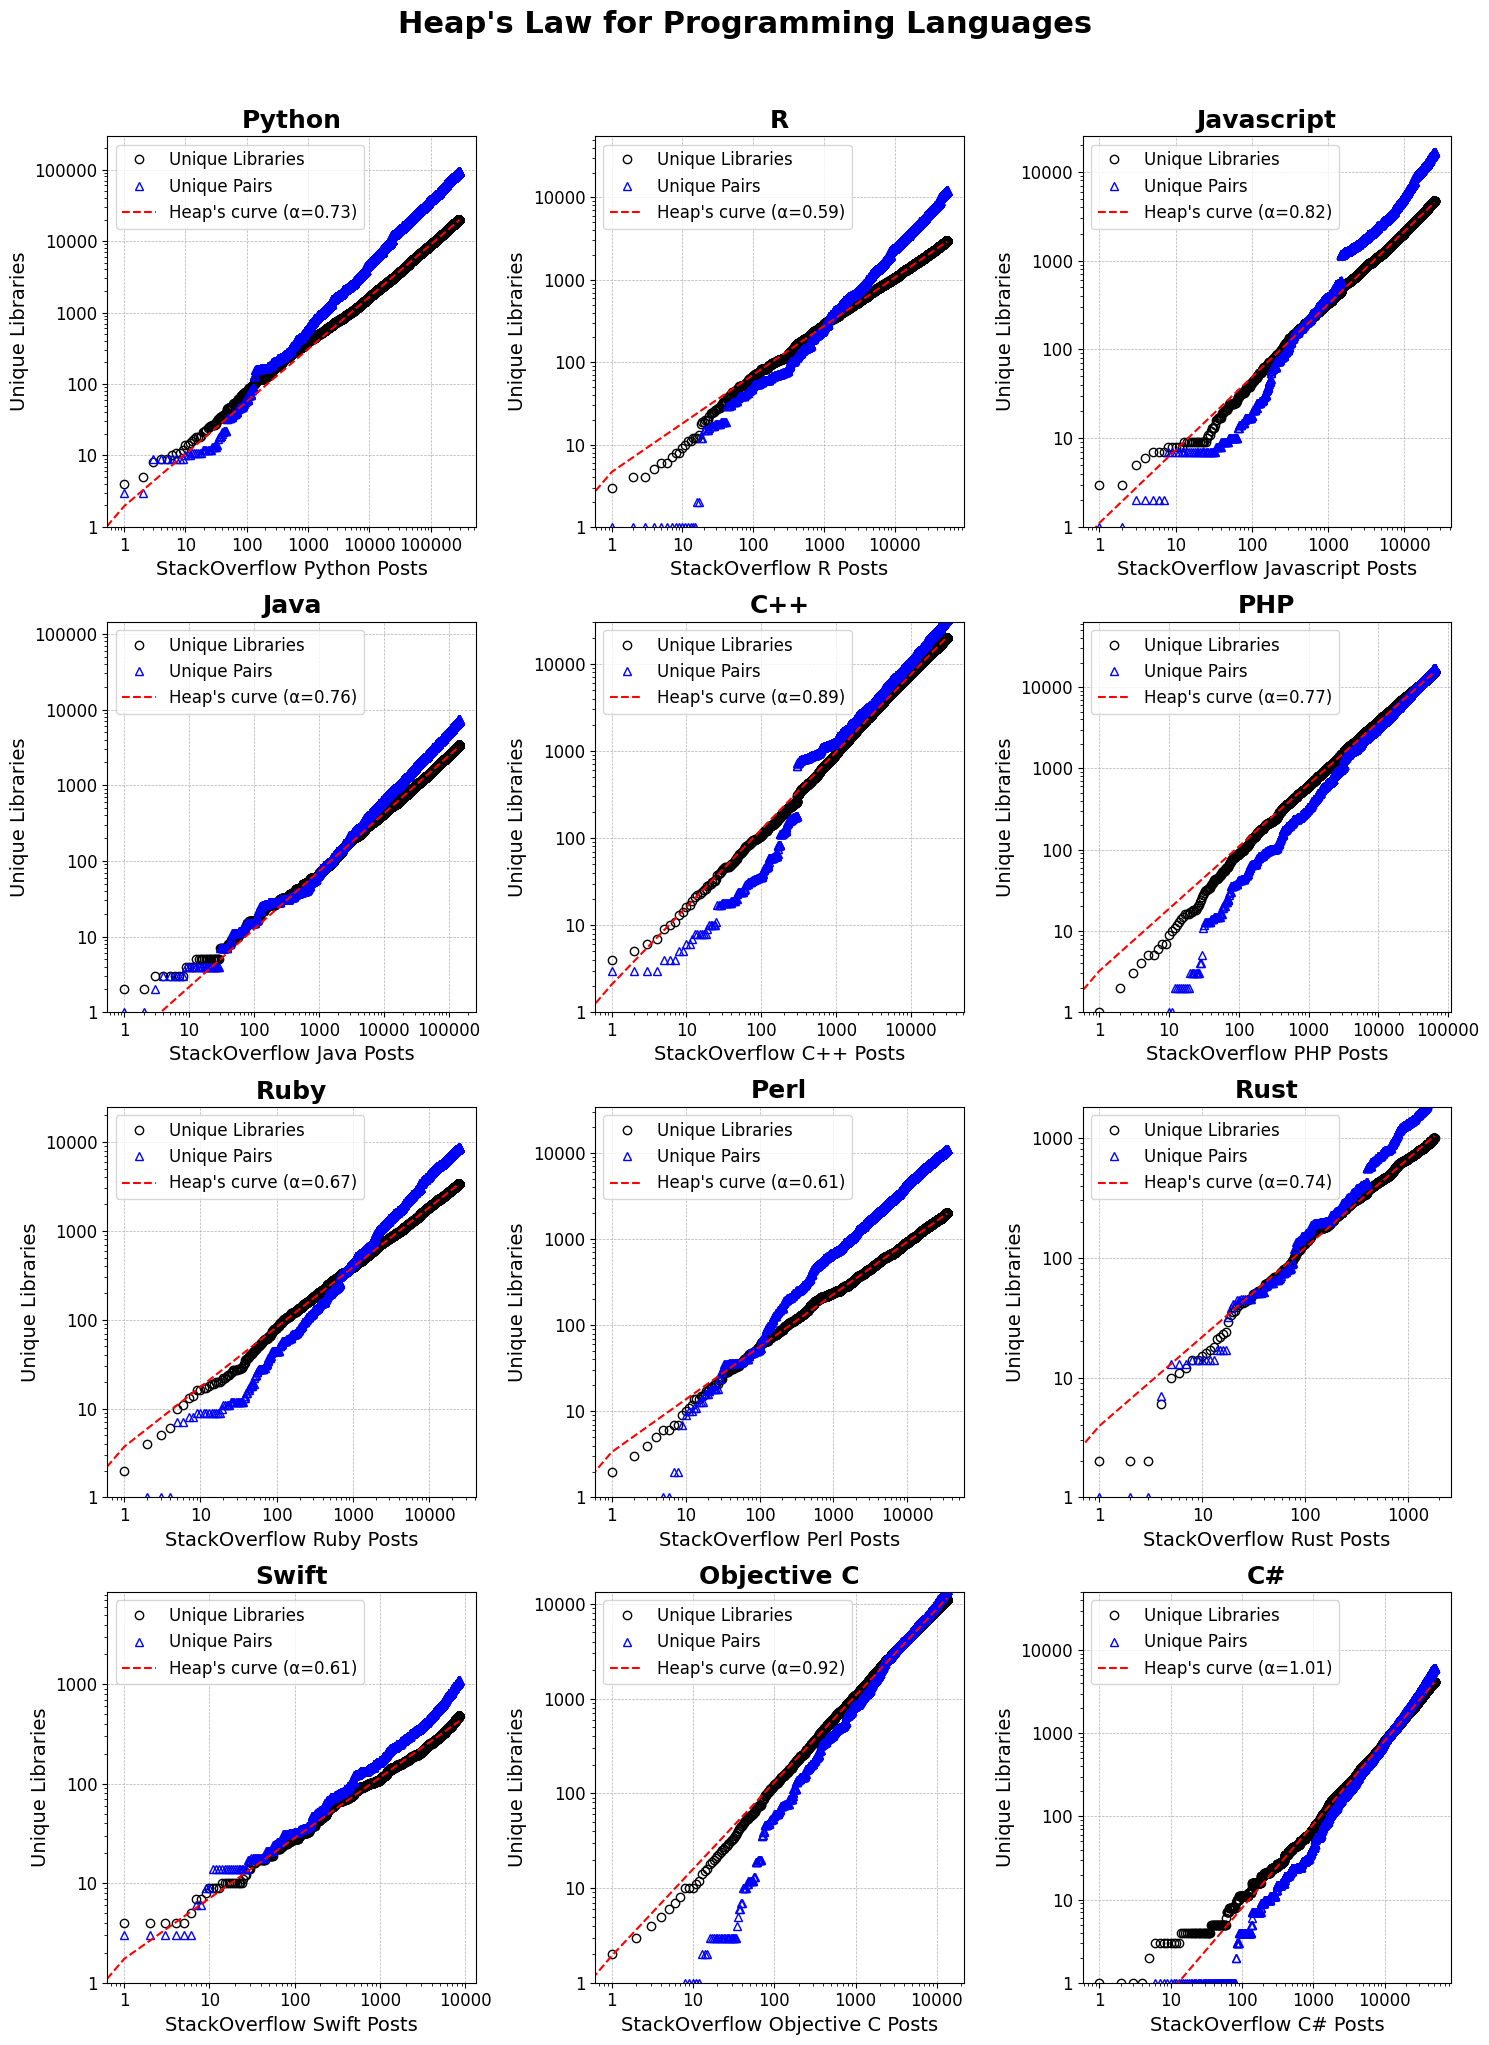

In [123]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import ScalarFormatter

import time
from sklearn.linear_model import LinearRegression


%matplotlib inline

square_size = 5
rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(square_size * columns, square_size * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3)

for index, language in enumerate(LANGUAGES):
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    
    print("\t Opening resources...")
    with open(f"{path_to_lib}/{language}_post_to_libs.json") as handle:
        post_to_libs = json.load(handle)
    
    with open(f"{path_to_lib}/{language}_all_libs_dates.json") as handle:
        all_libs_dates = json.load(handle)
        
    with open(f"{path_to_lib}/{language}_all_pairs_dates.json") as handle:
        all_pairs_dates = json.load(handle)
    print("\t...done.")

    t0 = time.time()
    xs_libs = np.array([d[0] for d in post_to_libs['distinct_libs_plot']])
    ys_libs = np.array([d[1] for d in post_to_libs['distinct_libs_plot']])
    xs_pairs = [d[0] for d in post_to_libs['distinct_pairs_plot']]
    ys_pairs = [d[1] for d in post_to_libs['distinct_pairs_plot']]
    t1 = time.time()
    print(f"\tSegments formed (took {round(t1 - t0, 2)} seconds).")
    
    # Unique libs line fit
    libs_a, libs_b  = np.polyfit(range(len(xs_libs)), ys_libs, 1)
    pairs_a, pairs_b = np.polyfit(range(len(xs_pairs)), ys_pairs, 1)
    t2 = time.time()
    print(f"\tFits performed (took {round(t2 - t1, 2)} seconds).")
    
    ###########################
    libs_count = [d[1] for d in post_to_libs['distinct_libs_plot']]
    xs = np.array(range(1, len(libs_count) + 1))
    xs_transformed = np.log(xs).reshape(-1 ,1 )
    counts_transformed = np.log(np.array(libs_count) + 1)
    
    model = LinearRegression()
    model.fit(xs_transformed, counts_transformed)
    
    alpha = model.coef_[0]
    log_c = model.intercept_
    c = np.exp(log_c)
    print(f"\tFit performed; alpha={alpha} c={c}")
    ############################

    xs = list(range(len(xs_libs)))
    
    ax.loglog(xs, [ys_libs[i] for i in xs], "o", color="black", markerfacecolor='none', label="Unique Libraries")
    ax.loglog(xs, [ys_pairs[i] for i in xs], "^", color="blue", markerfacecolor='none', label="Unique Pairs")
    ax.loglog(xs, [c*x**alpha for x in xs], "--", color="red", label=f"Heap's curve (α={round(alpha, 2)})")
    
    ax.set_ylim(1, len(xs_libs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.legend(fontsize=12, loc="upper left")
    ax.grid(True, which="major", linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel(f'StackOverflow {LANGUAGES[language]} Posts', fontsize=14)  # Add an appropriate X-axis label
    ax.set_ylabel('Unique Libraries', fontsize=14)  # Add an appropriate Y-axis label

   # Turn off scientific notation for the y-axis
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')

    # Turn off scientific notation for the x-axis
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')

fig.suptitle("Heap's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## Zip's Law

Processing python
Processing r
Processing javascript
Processing java
Processing cpp
Processing php
Processing ruby
Processing perl
Processing rust
Processing swift
Processing objectivec
Processing c#


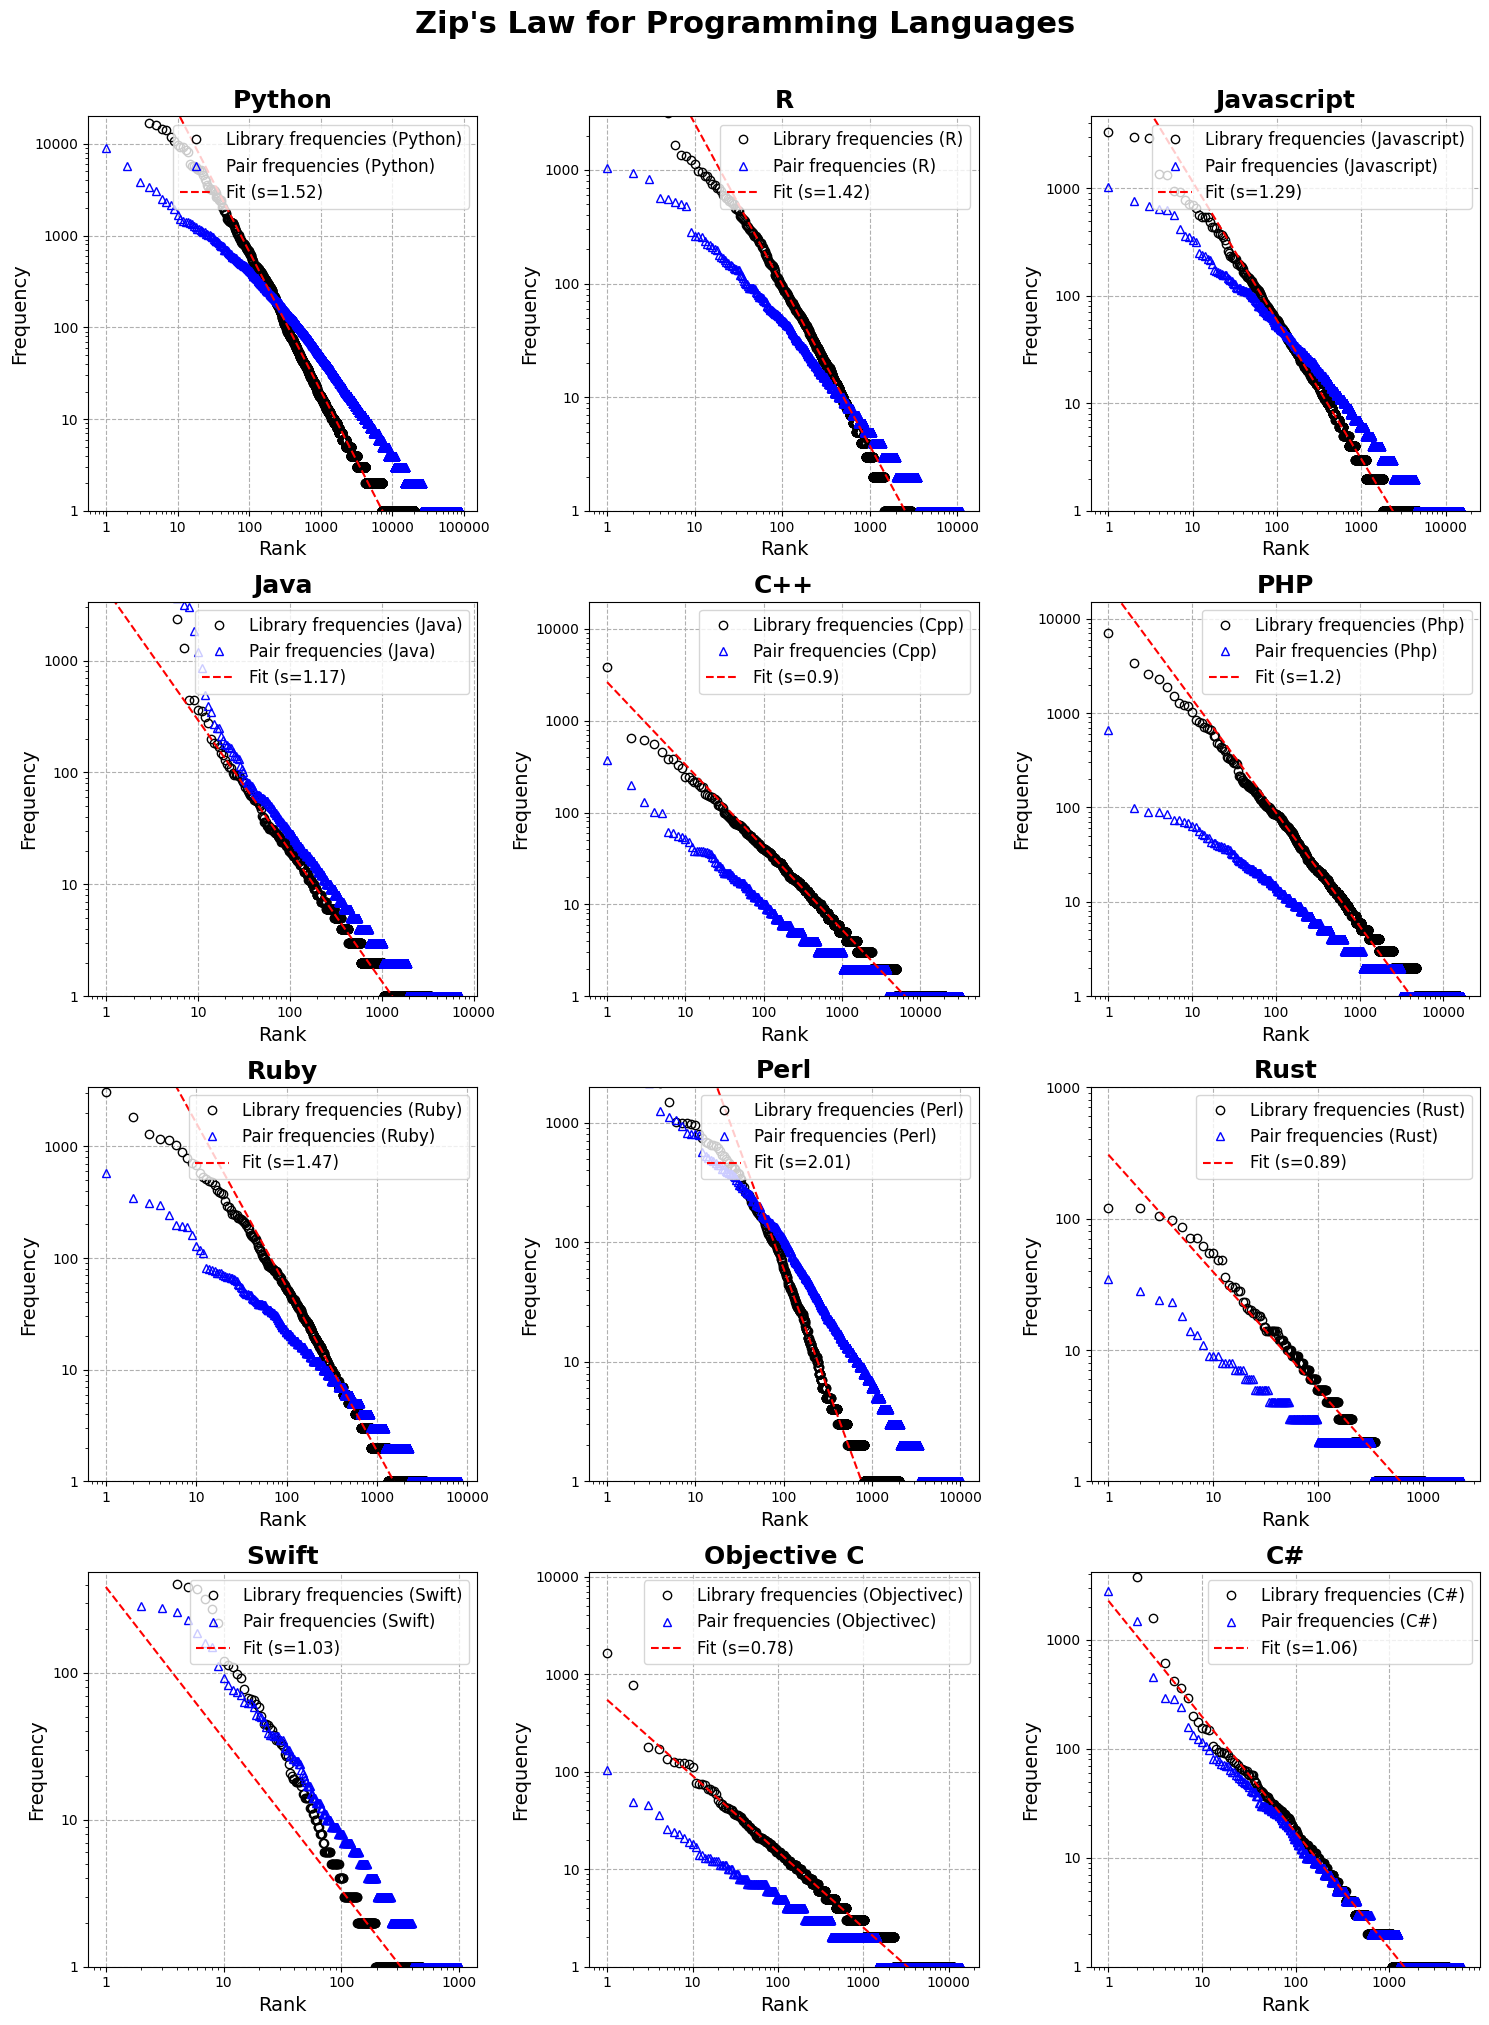

In [124]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit


def read_json(filepath):
    try:
        with open(filepath) as handle:
            return json.load(handle)
    except FileNotFoundError:
        print(f"File {filepath} not found.")
        return {}
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file {filepath}.")
        return {}

def plot_language_data(ax, language, path_to_lib):
    print(f"Processing {language}")
    post_to_libs = read_json(f"{path_to_lib}/{language}_post_to_libs.json")
    all_libs_dates = read_json(f"{path_to_lib}/{language}_all_libs_dates.json")
    all_pairs_dates = read_json(f"{path_to_lib}/{language}_all_pairs_dates.json")

    if not all_libs_dates:
        return

    libs_freq = {k: len(v) for k, v in all_libs_dates.items()}
    sorted_libs_freq = sorted(libs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_libs_freq_values = [x[1] for x in sorted_libs_freq]

    pairs_freq = {k:len(v) for k, v in all_pairs_dates.items()}
    sorted_pairs_freq = sorted(pairs_freq.items(), key=lambda x: x[1], reverse=True)
    sorted_pairs_freq_values = [x[1] for x in sorted_pairs_freq]

    xs = range(1, len(sorted_libs_freq) + 1)
    ax.loglog(xs, sorted_libs_freq_values,  "o",
              color="black", markerfacecolor='none',
              label=f"Library frequencies ({language.capitalize()})")

    ax.loglog(range(1, len(sorted_pairs_freq) + 1), sorted_pairs_freq_values,  "^",
              color="blue", markerfacecolor='none',
              label=f"Pair frequencies ({language.capitalize()})")

    ranks = np.arange(1, len(sorted_libs_freq_values) + 1)
    frequencies = np.array(sorted_libs_freq_values)

    def zipf(rank, s, k):
        return k / (rank ** s)

    region_start = 100
    region_end = 1000

    if len(ranks) < region_end:
        region_end = len(ranks)

    (s, k), cov = curve_fit(
        zipf,
        ranks[region_start:region_end],
        frequencies[region_start:region_end],
    )
    fitted_frequencies = zipf(ranks, s, k)
    ax.loglog(xs, fitted_frequencies, "r--", label=f"Fit (s={round(s, 2)})")
    ax.set_ylim(1, len(xs))
    ax.set_title(f'{LANGUAGES[language]}', fontsize=18, fontweight='bold')
    ax.set_xlabel('Rank', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, which="major", ls="--")
    ax.legend(fontsize=12, loc="upper right")

    # Turn off scientific notation for the y-axis
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='y')
    
    # Turn off scientific notation for the x-axis
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    ax.ticklabel_format(style='plain', axis='x')

rows, columns = (len(LANGUAGES) + 2) // 3, 3
fig = plt.figure(figsize=(15, 5 * rows))
gs = GridSpec(rows, columns, figure=fig)
plt.subplots_adjust(hspace=0.8, wspace=0.3) 

for index, language in enumerate(LANGUAGES):
    i, j = index // columns, index % columns
    ax = fig.add_subplot(gs[i, j])
    plot_language_data(ax, language, f"data/results/{language}")

fig.suptitle("Zip's Law for Programming Languages", fontsize=22, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()


In [110]:
sorted_libs_freq

[('numpy', 28064),
 ('sys', 28050),
 ('os', 25261),
 ('re', 16989),
 ('time', 15899),
 ('matplotlib', 14310),
 ('django', 14005),
 ('random', 11860),
 ('itertools', 10672),
 ('collections', 9613),
 ('datetime', 9269),
 ('pandas', 9137),
 ('csv', 8451),
 ('subprocess', 8043),
 ('json', 5963),
 ('urllib', 5769),
 ('scipy', 5661),
 ('urllib2', 5525),
 ('Tkinter', 5265),
 ('math', 5239),
 ('requests', 5238),
 ('threading', 4879),
 ('bs4', 4538),
 ('multiprocessing', 4144),
 ('socket', 3940),
 ('tkinter', 3599),
 ('string', 3413),
 ('__future__', 3194),
 ('operator', 3183),
 ('flask', 3165),
 ('logging', 3153),
 ('PyQt4', 3152),
 ('lxml', 3027),
 ('xml', 2894),
 ('wx', 2620),
 ('pygame', 2617),
 ('pylab', 2572),
 ('selenium', 2469),
 ('functools', 2439),
 ('PIL', 2430),
 ('glob', 2315),
 ('ctypes', 2064),
 ('sqlalchemy', 2031),
 ('unittest', 1878),
 ('cv2', 1865),
 ('scrapy', 1848),
 ('sklearn', 1746),
 ('pprint', 1723),
 ('google', 1528),
 ('argparse', 1526),
 ('BeautifulSoup', 1479),
 ('S

In [111]:
sorted_pairs_freq

[('matplotlib|numpy', 9010),
 ('os|sys', 5774),
 ('numpy|scipy', 3806),
 ('numpy|pandas', 3350),
 ('sys|time', 3046),
 ('os|time', 2528),
 ('PyQt4|sys', 2319),
 ('threading|time', 2141),
 ('os|subprocess', 1946),
 ('matplotlib|scipy', 1657),
 ('random|time', 1521),
 ('re|sys', 1437),
 ('numpy|pylab', 1413),
 ('datetime|time', 1399),
 ('subprocess|sys', 1379),
 ('os|re', 1352),
 ('django|os', 1286),
 ('matplotlib|mpl_toolkits', 1251),
 ('cv2|numpy', 1187),
 ('bs4|requests', 1186),
 ('multiprocessing|time', 1158),
 ('matplotlib|pandas', 1120),
 ('glob|os', 1107),
 ('bs4|urllib2', 1084),
 ('mpl_toolkits|numpy', 1041),
 ('numpy|sys', 1033),
 ('math|numpy', 1012),
 ('numpy|time', 1007),
 ('random|sys', 990),
 ('subprocess|time', 970),
 ('datetime|os', 961),
 ('socket|sys', 916),
 ('urllib|urllib2', 903),
 ('numpy|os', 883),
 ('matplotlib|pylab', 880),
 ('csv|sys', 863),
 ('os|shutil', 850),
 ('sys|threading', 821),
 ('csv|os', 786),
 ('collections|itertools', 780),
 ('re|urllib', 779),
 ('n